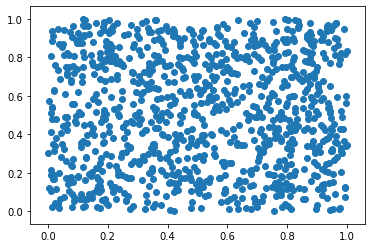

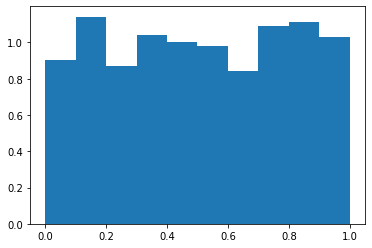

In [301]:
import numpy as np
import matplotlib.pyplot as plt


def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1

mas_of_randoms = [rng() for i in range(1000)]

#print(mas_of_randoms[:])
#print(mas_of_randoms[1:])
#print(mas_of_randoms[:-1])

plt.scatter(mas_of_randoms[1:], mas_of_randoms[:-1])
plt.show()

plt.hist(mas_of_randoms,density=True ) #hist shows plotnost
plt.show()



needed_time for mas1=: 0.007810000000006312
needed_time for mas2=: 0.009653999999997609


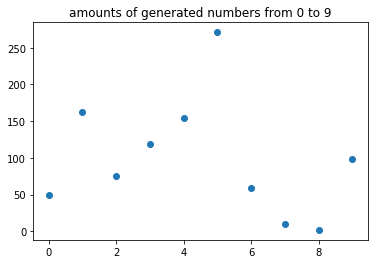

In [289]:
#task1: generate a sample from 0...9 with weights 
#0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2

import numpy as np
import matplotlib.pyplot as plt
import time

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1

def binsearch(x,mas,start,stop):
    mid=(start+stop)//2
    if (x>=mas[mid]):
        return (mid,stop)
    if (x<mas[mid]):
        return (start,mid)
    
def find_place(x,mas):
    start=0
    stop=10
    while(stop!=(start+1)):
        start,stop=binsearch(x,mas,start,stop)
    return start

def generate_number_upto_nine(mas):
    x=rng()
    otv=find_place(x,mas)
    return otv
  
def sample_and_amounts_of_generated_numbers(mas):
    mas_of_weights=np.empty(10)
    mas_of_weights[:]=mas

    total_weight=mas_of_weights.sum()
    mas_of_weights=mas_of_weights/total_weight
    #print("mas_of_weights:",mas_of_weights)

    mas_of_borders=np.empty(11)
    mas_of_borders[0]=0
    for i in range(1,11,1):
        mas_of_borders[i]=mas_of_borders[i-1]+mas_of_weights[i-1]  
    #print("mas_of_borders:",mas_of_borders)

    my_sample=np.empty(1000)
    amounts=np.zeros(10)
    for i in range(0,1000,1):
        tek=generate_number_upto_nine(mas_of_borders)
        my_sample[i]=tek
        amounts[tek]+=1
    return my_sample,amounts   
    
mas1=[0.12,0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2]
mas2=np.sort(mas1)

needed_time=time.process_time()
my_sample1,amounts1=sample_and_amounts_of_generated_numbers(mas1)
needed_time=time.process_time()-needed_time
print("needed_time for mas1=:",needed_time)

needed_time=time.process_time()
my_sample2,amounts2=sample_and_amounts_of_generated_numbers(mas2)
needed_time=time.process_time()-needed_time
print("needed_time for mas2=:",needed_time)


tmp=np.arange(10)
plt.scatter(tmp, amounts1)
plt.title("amounts of generated numbers from 0 to 9")
plt.show()

#fig,(ris1,ris2)=plt.subplots(nrows=2,ncols=1,figsize=(8,4))
#ris1.scatter(tmp, amounts1)
#ris1.set_title("mas1:amounts of generated numbers from 0 to 9 ")
#ris2.scatter(tmp, amounts2)
#ris2.set_title("mas2:amounts of generated numbers from 0 to 9 ")
#plt.show()
    


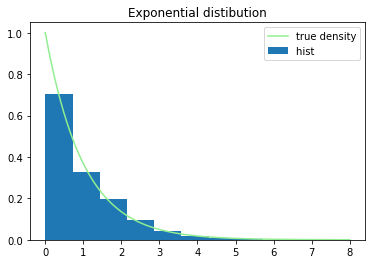

In [291]:
#task2: build a sample from Exp(lamda)
#distribution function F: y=1-exp{-lamda*x}
#F^(-1): x=-ln(1-y)/lamda

import numpy as np
import matplotlib.pyplot as plt
lamda=1
N=1000 #amount of sample
K=300 #amount of borders
Left_border=2
Right_border=8

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1

def get_plotnost(observed_distribution):
    observed_distribution=np.sort(observed_distribution)
    mas_of_borders=np.linspace(Left_border, Right_border,K+1,endpoint=True)
    mas_of_frequences=np.zeros(K)
    for i in range(K):
        amount=0
        for j in range(1,N,1):
            if (mas_of_borders[i-1] < observed_distribution[j] <= mas_of_borders[i]):
                amount=amount+1
        mas_of_frequences[i]=amount

    mas_of_frequences=mas_of_frequences/mas_of_frequences.sum()
    
    true_density28=np.zeros(K)
    tmp28=np.linspace(Left_border, Right_border,K,endpoint=True)
    true_density28=lamda*np.exp(-lamda*tmp28)
    
    plt.bar(mas_of_borders[1:],mas_of_frequences,label='observed distribution',color='yellow')
    plt.plot(tmp28,true_density28,label='true density',color='lightblue')
    plt.title("Exponential distibution")
    plt.legend()
    plt.show()



mas_of_randoms = [rng() for i in range(N)]
observed_distribution=np.zeros(N)
for i in range(0,N):
    observed_distribution[i]=np.log(1-mas_of_randoms[i])/(-lamda)
    

#get_plotnost(observed_distribution)


true_density=np.zeros(K)
tmp=np.linspace(0, Right_border,K,endpoint=True)
true_density=lamda*np.exp(-lamda*tmp)


plt.plot(tmp,true_density,label='true density',color='lightgreen')
plt.hist(observed_distribution,density=True,label="hist ")
plt.title("Exponential distibution")
plt.legend()
plt.show()





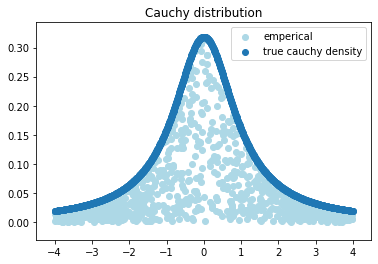

In [324]:
#task3: cauchy distribution

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

cauchy_distrib = stats.cauchy()

plotnost_x = np.linspace(-4, 4, 1000)
plotnost_y=np.zeros(1000)
for i in range(1000):
    plotnost_y[i]=cauchy_distrib.pdf(plotnost_x[i])
    

mas_of_x=np.zeros(1000)
mas_of_y=np.zeros(1000)
for i in range(1000):
    mas_of_x[i]=8*rng()-4
    mas_of_y[i]=rng()*cauchy_distrib.pdf(mas_of_x[i])
    
plt.scatter(mas_of_x,mas_of_y,label="emperical",color='lightblue')
plt.scatter(plotnost_x,plotnost_y,label="true cauchy density")
plt.title("Cauchy distribution")
plt.legend()
plt.show()



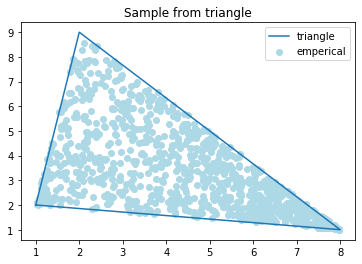

In [335]:
#task4: sample from triangle
triangle_x=[1,2,8,1]
triangle_y=[2,9,1,2]

def get_y_1(x):
    dlina=(7*x-5) - ((-x+15)/7)
    return ((-x+15)/7)+rng()*dlina 
def get_y_2(x):
    dlina=((-4)*x+35)/3 - ((-x+15)/7)
    return ((-x+15)/7)+rng()*dlina 

mas_of_x=np.zeros(1000)
mas_of_y=np.zeros(1000)
for i in range(1000):
    mas_of_x[i]=7*rng()+1
    if (mas_of_x[i]<2):
        mas_of_y[i]=get_y_1(mas_of_x[i])
    if (mas_of_x[i]>=2):
        mas_of_y[i]=get_y_2(mas_of_x[i])
        
plt.scatter(mas_of_x,mas_of_y,label="emperical",color='lightblue')
plt.plot(triangle_x,triangle_y,label="triangle")
plt.title("Sample from triangle")
plt.legend()
plt.show()

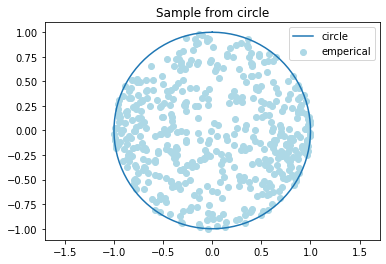

In [350]:
#task5: sample from a circle

from matplotlib.patches import Circle
import math
   
def get_y(x):
    dlina=2*pow(1-pow(x,2),0.5)
    return dlina*rng() - 0.5*dlina
 
t = np.linspace(0, 2 * np.pi, 100)
    
mas_of_x=np.zeros(500)
mas_of_y=np.zeros(500)
for i in range(500):
    mas_of_x[i]=2*rng()-1
    mas_of_y[i]=get_y(mas_of_x[i])
    
plt.scatter(mas_of_x,mas_of_y,label="emperical",color='lightblue')
plt.plot(np.sin(t), np.cos(t),label='circle')
plt.axis('equal')
plt.title("Sample from circle")
plt.legend()
plt.show()


x_walk: [-1.  1.  1. -1.  1. -1. -1. -1.  1. -1.]
y_walk: [ 1.  1.  1.  1. -1.  1.  1. -1.  1.  1.]
walk: [-1.  1.  1.  1.  1.  1. -1.  1.  1. -1.]
mas_of_x: [ 0. -1. -2. -1. -2. -1. -2. -3. -4. -3.]
mas_of_y: [ 0. -1.  0.  1.  2.  3.  4.  3.  4.  5.]


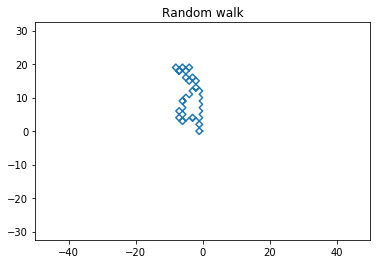

In [400]:
#task6: random walk
N=100

def give_step(left_plus,left_minus):
    tmp=rng()
    if (tmp>=0.5):
        if(left_plus>0): 
            return 1
        elif (left_plus==0): 
            return -1
    elif (tmp<0.5): 
        if (left_minus>0):
            return -1
        elif (left_minus==0): return 1
    

def generate_one_axis_walk():
    mas_of_signs=np.zeros(N//2)
    left_plus=N//4
    left_minus=N//4
    for i in range(N//2):
        mas_of_signs[i]=give_step(left_plus,left_minus)
        if (mas_of_signs[i]==1):
            left_plus=left_plus-1
        else:
            left_minus=left_minus-1
            
            
    return mas_of_signs
            
x_walk=generate_one_axis_walk()
y_walk=generate_one_axis_walk()
print("x_walk:",x_walk[0:10])
print("y_walk:",y_walk[0:10])
walk=np.zeros(N)
for i in range(N):
    if (i%2==0):
        walk[i]=x_walk[i//2]
    elif (i%2==1):
        walk[i]=y_walk[i//2]
    

print("walk:",walk[0:10])

mas_of_x=np.zeros(N+1)
mas_of_y=np.zeros(N+1)
mas_of_x[0]=0
mas_of_y[0]=0
for i in range(0,N):
    if (i%2==0):
        if (walk[i]==1):
            mas_of_x[i+1]=mas_of_x[i]+1
            mas_of_y[i+1]=mas_of_y[i]+1
        elif (walk[i]==-1):
            mas_of_x[i+1]=mas_of_x[i]-1
            mas_of_y[i+1]=mas_of_y[i]-1
    elif (i%2==1):
        if (walk[i]==1):
            mas_of_x[i+1]=mas_of_x[i]-1
            mas_of_y[i+1]=mas_of_y[i]+1
        elif (walk[i]==-1):
            mas_of_x[i+1]=mas_of_x[i]+1
            mas_of_y[i+1]=mas_of_y[i]-1

print("mas_of_x:",mas_of_x[0:10])
print("mas_of_y:",mas_of_y[0:10])
            
plt.plot(mas_of_x,mas_of_y)
plt.axis('equal')
plt.title("Random walk")
plt.xlim(-N//2,N//2)
plt.ylim(-N//2,N//2)
plt.show()
        



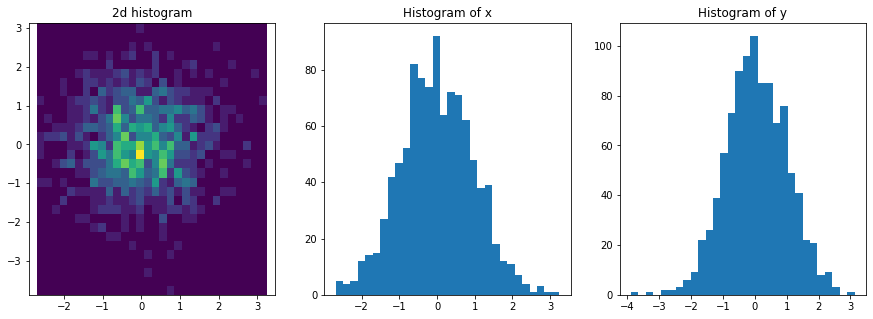

In [2]:
#task7: normal disribution
#Box-Muller number1
import numpy as np
import matplotlib.pyplot as plt

n = 1000
r = np.random.rand(n)
theta = 2*np.pi*np.random.rand(n)
x = np.sqrt(-2 * np.log(r)) * np.cos(theta)
y = np.sqrt(-2 * np.log(r))* np.sin(theta)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[0].set_title("2d histogram")
ax[1].hist(x, bins=30)
ax[1].set_title("Histogram of x")
ax[2].hist(y, bins=30)
ax[2].set_title("Histogram of y")

plt.show()

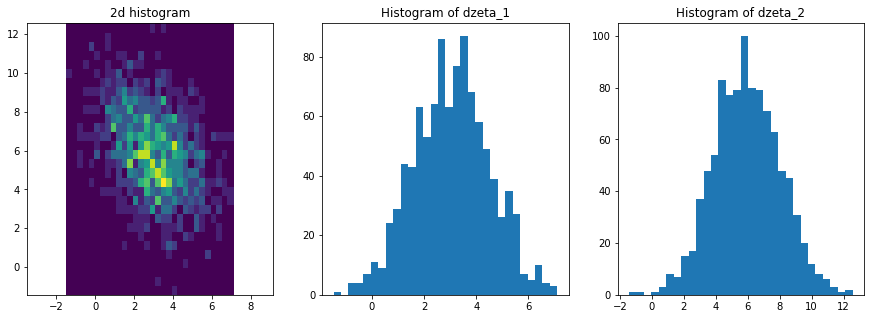

In [3]:
#Box-Muller number2
import numpy as np
import matplotlib.pyplot as plt

N=1000
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1

def give_indep_stand_norm():
    x=-1+2*rng()
    y=-1+2*rng()
    while((x*x + y*y >1) or (x*x + y*y ==0)):
        x=-1+2*rng()
        y=-1+2*rng()
    
    s= x*x + y*y
    a = x*np.sqrt(-2 * np.log(s)/s) 
    b = y*np.sqrt(-2 * np.log(s)/s) 
    return a,b

def matrix_mult_matrix(A,B):
    T=np.zeros(4) 
    T=T.reshape((2,2))
    for i in range(2):
        for j in range(2):
            s=0
            for k in range(2):
                s=s+A[i][k]*B[k][j]
            T[i][j]=s
    return T

def matrix_mult_vector(A,X):
    T=np.zeros(2) 
    T=T.reshape((2,1))
    for i in range(2):
        s=0
        for k in range(2):
            s=s+A[i][k]*X[k]
        T[i]=s
    return T

            


J=np.zeros(4) 
J=J.reshape((2,2))
J[0][0]=3+np.sqrt(2)
J[1][1]=3-np.sqrt(2)

C=np.zeros(4) 
C=C.reshape((2,2))
C[0][0]=(-1+np.sqrt(2))/(np.sqrt(4-2*np.sqrt(2)))
C[0][1]=(-1-np.sqrt(2))/(np.sqrt(4+2*np.sqrt(2)))
C[1][0]=1/(np.sqrt(4-2*np.sqrt(2)))
C[1][1]=1/(np.sqrt(4+2*np.sqrt(2)))


C_inv=np.linalg.inv(C)

mean36=np.zeros(2).reshape((2,1))
mean36[0]=3
mean36[1]=6
mean=matrix_mult_vector(C,mean36)


ksi_1=np.zeros(N)
ksi_2=np.zeros(N)
for i in range(N):
    a,b=give_indep_stand_norm()
    ksi_1[i]=a
    ksi_2[i]=b

ksi_1=ksi_1*np.sqrt(3+np.sqrt(2))
ksi_2=ksi_2*np.sqrt(3-np.sqrt(2))


eta_1=np.zeros(N)
eta_2=np.zeros(N)
for i in range(N):
    eta_1[i]=C_inv[0][0]*ksi_1[i]+C_inv[0][1]*ksi_2[i]
    eta_2[i]=C_inv[1][0]*ksi_1[i]+C_inv[1][1]*ksi_2[i]

dzeta_1=np.zeros(N)
dzeta_2=np.zeros(N)
dzeta_1=3+eta_1
dzeta_2=6+eta_2


fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(dzeta_1, dzeta_2, bins=30)
ax[0].axis('equal')
ax[0].set_title("2d histogram")
ax[1].hist(dzeta_1, bins=30)
ax[1].set_title("Histogram of dzeta_1")
ax[2].hist(dzeta_2, bins=30)
ax[2].set_title("Histogram of dzeta_2")

plt.show()




mean amount of colors= 28.575


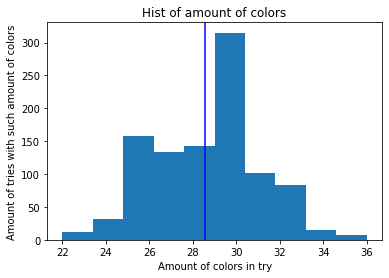

In [4]:
#task8: Partitions of a set
import numpy as np
import matplotlib.pyplot as plt
import math
N=100
tries=1000

def give_Bell_numbers(N):
    mas=np.zeros(N+1)
    mas[0]=1
    for n in range(1,N+1):
        s=0
        for k in range (0,n):
            s=s+mas[k]* math.factorial(n-1)/( math.factorial(k)* math.factorial(n-1-k))
        mas[n]=s
    return mas
def find_amount_of_colors(mas_of_weights,mas_of_values):
    K=np.random.choice(mas_of_values, None, True, mas_of_weights[1:]) 
    mas_of_col=np.zeros(N)
    for i in range(N):
        mas_of_col[i]=int(1+K*rng())
    return len(np.unique(mas_of_col))
    

Bell_numbers=np.zeros(N+1)
Bell_numbers= give_Bell_numbers(N)
#print(Bell_numbers)

mas_of_weights=np.zeros(N+1)
s=0
for k in range(1,N+1):
    mas_of_weights[k]=math.pow(k,N)/((math.e)*(math.factorial(k))*(Bell_numbers[N]))
    s=s+mas_of_weights[k]
mas_of_weights=mas_of_weights/s
mas_of_values=1+np.arange(N)

mas_of_tries=np.zeros(tries)
for i in range(tries):
    mas_of_tries[i]=find_amount_of_colors(mas_of_weights,mas_of_values)

print("mean amount of colors=",mas_of_tries.mean())
plt.hist(mas_of_tries)
plt.axvline(mas_of_tries.mean(),c='b')
plt.title("Hist of amount of colors")
plt.xlabel("Amount of colors in try")
plt.ylabel("Amount of tries with such amount of colors")
plt.show()